In [128]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
%autoreload 2

In [130]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [131]:
train = pd.read_csv('data/processed/train.csv')
val = pd.read_csv('data/processed/val.csv')

In [132]:
train['not spam'] = 1 - train['spam']
val['not spam'] = 1 - val['spam']

In [133]:
x_cols = train.columns[:-2]
y_cols = train.columns[-2:]

In [134]:
s = MinMaxScaler()
s.fit(train[x_cols].values)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [135]:
xtr = s.transform(train[x_cols].values)
ytr = train[y_cols].values

In [136]:
xv = s.transform(val[x_cols].values)
yv = val[y_cols].values

In [161]:
xtr.shape

(2761, 57)

In [137]:
from nn3 import NN

In [138]:
net = NN(ninputs=57, nhidden=10, noutput=2)

In [139]:
def prob(x):
    return np.exp(x) / np.sum(np.exp(x))

In [140]:
prob(net.predict(xtr[0]))

array([[0.37293376, 0.62706624]])

In [141]:
net.fit(xtr[0], ytr[0])

0.7598256824916452

In [142]:
te = []
ve = []

for row in range(xtr.shape[0]):
    te.append(net.fit(xtr[row], ytr[row]))
    ve.append

[[0.24700453 0.75299547]]
1.0000000000000002
[[0.23996285 0.76003715]]
1.0000000000000002
[[0.24001737 0.75998263]]
0.9999999999999999
[[0.2536902 0.7463098]]
1.0000000000000002
[[0.24264611 0.75735389]]
0.9999999999999999
[[0.24427789 0.75572211]]
0.9999999999999999
[[0.2635461 0.7364539]]
0.9999999999999999
[[0.26402651 0.73597349]]
0.9999999999999999
[[0.26603276 0.73396724]]
0.9999999999999999
[[0.30098689 0.69901311]]
0.9999999999999999
[[0.28954099 0.71045901]]
0.9999999999999999
[[0.2923742 0.7076258]]
0.9999999999999999
[[0.29381886 0.70618114]]
0.9999999999999999
[[0.30614115 0.69385885]]
0.9999999999999998
[[0.30122059 0.69877941]]
0.9999999999999999
[[0.292998 0.707002]]
0.9999999999999999
[[0.29701809 0.70298191]]
0.9999999999999999
[[0.29404264 0.70595736]]
0.9999999999999999
[[0.30359563 0.69640437]]
0.9999999999999999
[[0.30697437 0.69302563]]
0.9999999999999998
[[0.31064947 0.68935053]]
0.9999999999999999
[[0.31693666 0.68306334]]
0.9999999999999999
[[0.31564317 0.68435

[[0.40631247 0.59368753]]
0.9999999999999999
[[0.38747167 0.61252833]]
0.9999999999999999
[[0.39381348 0.60618652]]
0.9999999999999999
[[0.39980781 0.60019219]]
0.9999999999999999
[[0.39275832 0.60724168]]
0.9999999999999999
[[0.41021311 0.58978689]]
0.9999999999999999
[[0.43736351 0.56263649]]
0.9999999999999999
[[0.41236447 0.58763553]]
0.9999999999999999
[[0.41671837 0.58328163]]
0.9999999999999999
[[0.38873407 0.61126593]]
0.9999999999999999
[[0.4091025 0.5908975]]
0.9999999999999999
[[0.39409179 0.60590821]]
0.9999999999999999
[[0.40249 0.59751]]
1.0000000000000002
[[0.40176391 0.59823609]]
0.9999999999999999
[[0.44346098 0.55653902]]
0.9999999999999999
[[0.43257014 0.56742986]]
0.9999999999999999
[[0.4137063 0.5862937]]
0.9999999999999999
[[0.40247041 0.59752959]]
0.9999999999999999
[[0.41020773 0.58979227]]
0.9999999999999999
[[0.44823705 0.55176295]]
0.9999999999999999
[[0.40145916 0.59854084]]
0.9999999999999999
[[0.47127695 0.52872305]]
0.9999999999999999
[[0.43708507 0.56291

In [143]:
import matplotlib.pyplot as plt

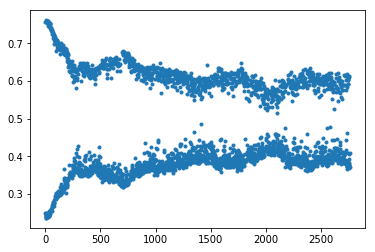

In [144]:
plt.plot(te, '.')

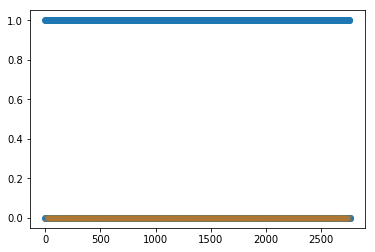

In [145]:
plt.plot(ytr[:,0], 'o')
plt.plot(net.predict(xtr)[:,0], 'x', alpha=0.05)

In [146]:
net.misclassification(xv, yv)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[]
920


1.0

In [147]:
net.predict(xv)

array([[0.00069508, 0.0009927 ],
       [0.00080353, 0.00111424],
       [0.00034918, 0.00057561],
       ...,
       [0.00048211, 0.00074214],
       [0.00025163, 0.00043662],
       [0.00035057, 0.00057591]])

In [148]:
net2 = NN(ninputs=57, nhidden=100, noutput=2)

In [149]:
net2.predict(xtr[0])

array([[0.99832797, 0.00167203]])

In [150]:
net2.fit(xtr[0], ytr[0])

[[0.99832797 0.00167203]]
0.9999999999999999


0.0016720274894559406

In [151]:
net2.rmse(xv, yv)

0.9999646350979778

In [152]:
net2.fit(xtr[1], ytr[1])

0.9991058429921232

In [153]:
for i in range(xtr.shape[0]):
    net2.fit(xtr[i], ytr[i])

[[0.98445946 0.01554054]]
0.9999999999999999
[[0.97268905 0.02731095]]
0.9999999999999999
[[0.98498559 0.01501441]]
0.9999999999999999
[[0.96891106 0.03108894]]
0.9999999999999999
[[0.94193391 0.05806609]]
0.9999999999999999
[[0.9226801 0.0773199]]
0.9999999999999999
[[0.93811057 0.06188943]]
0.9999999999999999
[[0.87929833 0.12070167]]
0.9999999999999999
[[0.88716587 0.11283413]]
0.9999999999999999
[[0.85105702 0.14894298]]
0.9999999999999999
[[0.85115431 0.14884569]]
0.9999999999999999
[[0.78187221 0.21812779]]
0.9999999999999999
[[0.77076116 0.22923884]]
0.9999999999999999
[[0.73578807 0.26421193]]
0.9999999999999999
[[0.68270034 0.31729966]]
0.9999999999999999
[[0.64598571 0.35401429]]
0.9999999999999999
[[0.52012908 0.47987092]]
0.9999999999999999
[[0.51632916 0.48367084]]
0.9999999999999999
[[0.49314936 0.50685064]]
0.9999999999999999
[[0.50870184 0.49129816]]
0.9999999999999999
[[0.50322894 0.49677106]]
0.9999999999999999
[[0.53005763 0.46994237]]
0.9999999999999999
[[0.44102021

[[0.43889888 0.56110112]]
0.9999999999999999
[[0.36842136 0.63157864]]
0.9999999999999999
[[0.42159164 0.57840836]]
0.9999999999999999
[[0.4298979 0.5701021]]
0.9999999999999999
[[0.46145396 0.53854604]]
0.9999999999999999
[[0.40966148 0.59033852]]
0.9999999999999999
[[0.48231042 0.51768958]]
0.9999999999999999
[[0.45722445 0.54277555]]
1.0000000000000002
[[0.45535721 0.54464279]]
0.9999999999999999
[[0.47751729 0.52248271]]
0.9999999999999999
[[0.43968046 0.56031954]]
0.9999999999999999
[[0.41250236 0.58749764]]
0.9999999999999998
[[0.53209962 0.46790038]]
0.9999999999999998
[[0.41152329 0.58847671]]
0.9999999999999999
[[0.45381847 0.54618153]]
0.9999999999999999
[[0.47197331 0.52802669]]
0.9999999999999999
[[0.48281368 0.51718632]]
0.9999999999999999
[[0.45685115 0.54314885]]
0.9999999999999999
[[0.47135667 0.52864333]]
0.9999999999999999
[[0.47955723 0.52044277]]
0.9999999999999999
[[0.43467354 0.56532646]]
0.9999999999999998
[[0.39940443 0.60059557]]
0.9999999999999998
[[0.45761807

In [154]:
net2.rmse(xv, yv)

0.9999731906493284

In [155]:
net2.predict(xv[0])

array([[0.38170564, 0.61829436]])

In [156]:
yv[0]

array([1, 0])

In [157]:
yp = net2.predict(xv)

In [158]:
yp.shape

(920, 2)

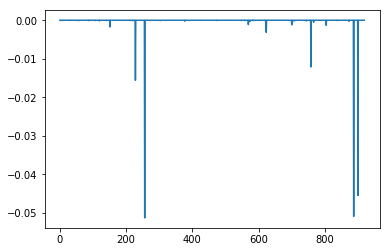

In [159]:
plt.plot(yp[:,0] - yp[:,1])

In [160]:
len(np.arange(5))

5